In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set_theme(style="darkgrid")

file_name = "data/forFBpost.csv"
df = pd.read_csv(file_name, sep=';', header=0)

### 1. Исследование и подготовка данных

In [2]:
df.shape

(30250, 6)

In [3]:
df.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0


 Посмотрим на тип каждой колонки, количество NaN значений, а также количество уникальных значений

In [4]:
pd.concat([df.dtypes, df.isna().sum(), df.nunique()], axis=1) \
  .rename(columns={0:'column type', 1:'number of NaN', 2:'number of unique'})

,column type,number of NaN,number of unique
Город,object,0,248
year,int64,0,121
fact,float64,27000,2408
Модель,float64,0,4332
Нижняя граница,float64,0,4340
Верхняя граница,float64,0,4373


 Итак в исходном дата-сете в фактических значениях много пропусков, можем очистить их для проведения дальнейшего анализа

Посмотрим на количество городов и на то, какое количество данных есть для каждого города

In [5]:
unique_city = df['Город'].unique()
unique_city

array(['Белокуриха', 'Новоалтайск', 'Краснодар', 'Анапа', 'Бородино',
       'Шарыпово', 'Большой Камень', 'Партизанск', 'Ессентуки',
       'Лермонтов', 'Невинномысск', 'Николаевск-на-Амуре', 'Завитинск',
       'Белогорск', 'Райчихинск', 'Шимановск', 'Сольвычегодск',
       'Архангельск', 'Новодвинск', 'Бирюч', 'Мглин', 'Почеп', 'Клинцы',
       'Карабаново', 'Гороховец', 'Курлово', 'Киржач', 'Петушки',
       'Костерево', 'Покров', 'Юрьев-Польский', 'Гусь-Хрустальный',
       'Калач-на-Дону', 'Новоаннинский', 'Серафимович', 'Краснослободск',
       'Камышин', 'Михайловка', 'Урюпинск', 'Фролово', 'Бабаево',
       'Красавино', 'Вытегра', 'Никольск', 'Сокол', 'Тотьма', 'Бобров',
       'Бутурлиновка', 'Калач', 'Лиски', 'Новохопёрск', 'Павловск',
       'Семилуки', 'Ветлуга', 'Городец', 'Володарск', 'Кстово', 'Сергач',
       'Арзамас', 'Дзержинск', 'Кулебаки', 'Навашино', 'Гаврилов Посад',
       'Заволжск', 'Наволоки', 'Плес', 'Приволжск', 'Пучеж', 'Фурманов',
       'Иваново', 'Кохм

In [6]:
print(f'В датасете {len(unique_city)} уникальных городов')

В датасете 248 уникальных городов


In [7]:
df['Город'].value_counts()

Кировск           242
Краснослободск    242
 Реж              121
Новочеркасск      121
Новошахтинск      121
                 ... 
Кимры             121
Удомля            121
Козельск          121
Медынь            121
Облучье           121
Name: Город, Length: 248, dtype: int64

Посмотрим есть ли повторы данных:

In [8]:
df[df.duplicated()]

,Город,year,fact,Модель,Нижняя граница,Верхняя граница


Очистим нулевые значения для исследования точности предсказания модельных значений:

In [9]:
df_clear = df.dropna()
df_clear['Город'].value_counts()

Кировск           26
Краснослободск    26
 Реж              13
Новочеркасск      13
Новошахтинск      13
                  ..
Кимры             13
Удомля            13
Козельск          13
Медынь            13
Облучье           13
Name: Город, Length: 248, dtype: int64

### Исследование зависимостей

Рассмотрим общий рост численности населения для всех городов:

In [10]:
group_by_year = df_clear.groupby(['year'])
group_by_year.agg(['sum','mean','std'])

/tmp/ipykernel_23680/1688514214.py:2: FutureWarning: ['Город'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_by_year.agg(['sum','mean','std'])


fact                                 Модель            \
             sum        mean            std         sum      mean   
year                                                                
2008  30624410.0  122497.640  715334.730000  30489600.0  121958.4   
2009  30712231.0  122848.924  721235.927880  30737000.0  122948.0   
2010  30940130.0  123760.520  727967.172861  30975400.0  123901.6   
2011  31353440.0  125413.760  752619.316109  31201400.0  124805.6   
2012  31487400.0  125949.600  757770.917918  31413700.0  125654.8   
2013  31698056.0  126792.224  765631.747341  31610600.0  126442.4   
2014  31897252.0  127589.008  773878.992560  31790400.0  127161.6   
2015  32052626.0  128210.504  779634.748571  31953300.0  127813.2   
2016  32245644.0  128982.576  788067.280508  32104500.0  128418.0   
2017  32335183.0  129340.732  791377.002286  32242500.0  128970.0   
2018  32490254.0  129961.016  799326.006563  32369000.0  129476.0   
2019  32656151.0  130624.604  806209.587381  32485900.0  129943.6   
2020  32706275.0  130825.100  810108.379912  32595100.0  130380.4   

                    Нижняя граница                          Верхняя граница  \
                std            sum      mean            std             sum   
year                                                                          
2008  708460.905972     30229500.0  120918.0  705483.713544      30778200.0   
2009  719753.158222     30476700.0  121906.8  716821.372165      31023200.0   
2010  730519.406072     30715900.0  122863.6  727637.318962      31258200.0   
2011  740731.477918     30944100.0  123776.4  737899.887123      31482600.0   
2012  750342.138130     31157700.0  124630.8  747560.414592      31691600.0   
2013  759368.773244     31356300.0  125425.2  756637.044370      31885100.0   
2014  767758.324517     31538400.0  126153.6  765075.965574      32061500.0   
2015  775572.531691     31706600.0  126826.4  772940.499863      32222800.0   
2016  782842.579304     31858900.0  127435.6  780261.136426      32369900.0   
2017  789632.273027     32001700.0  128006.8  787100.865738      32505000.0   
2018  795941.564463     32132700.0  128530.8  793453.469692      32629000.0   
2019  801821.203654     32253800.0  129015.2  799382.249196      32743400.0   
2020  807302.949048     32367900.0  129471.6  804913.746554      32849400.0   

                               
          mean            std  
year                           
2008  123112.8  711454.413047  
2009  124092.8  722699.110700  
2010  125032.8  733416.677788  
2011  125930.4  743573.825691  
2012  126766.4  753142.055001  
2013  127540.4  762119.278214  
2014  128246.0  770458.294379  
2015  128891.2  778221.483378  
2016  129479.6  785440.958814  
2017  130020.0  792179.250283  
2018  130516.0  798437.079012  
2019  130973.6  804264.814043  
2020  131397.6  809695.951906

/tmp/ipykernel_23680/1146084478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_year.sum().plot(ax=plt.gca())


<AxesSubplot:xlabel='year'>

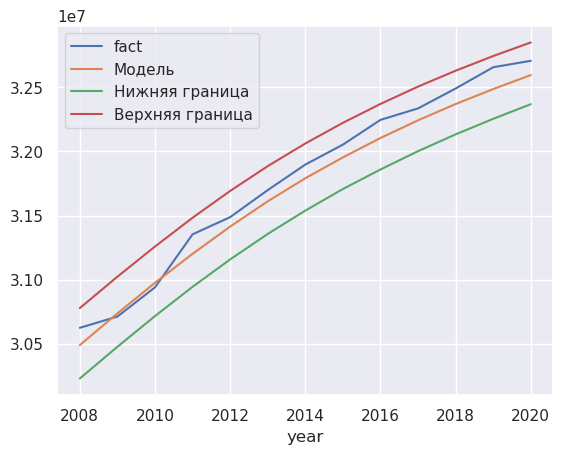

In [11]:
group_by_year.sum().plot(ax=plt.gca())

/tmp/ipykernel_23680/2492282268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_year.mean().plot(ax=plt.gca())


<AxesSubplot:xlabel='year'>

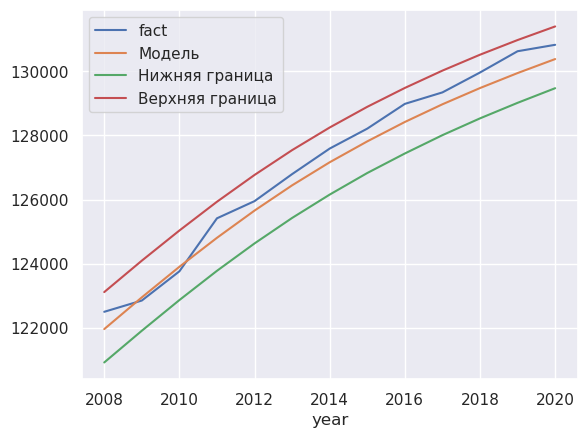

In [12]:
group_by_year.mean().plot(ax=plt.gca())

Модель с погрешностями хорошо описывает истинное значение количества населения. Для суммарного и среднего значения количества населения за год наблюдается непрерывный рост

Рассмотрим данные для первого города в датафрейме. Видим, что сначала население падает до 2013 года, после начинает возрастать до 2017

In [13]:
group_by_year.first()

,Город,fact,Модель,Нижняя граница,Верхняя граница
year,,,,,
2008,Белокуриха,14781.0,14900.0,14600.0,15200.0
2009,Белокуриха,14781.0,14800.0,14500.0,15100.0
2010,Белокуриха,14701.0,14700.0,14400.0,15100.0
2011,Белокуриха,14516.0,14700.0,14400.0,15000.0
2012,Белокуриха,14375.0,14700.0,14400.0,15000.0
2013,Белокуриха,14435.0,14700.0,14400.0,15000.0
2014,Белокуриха,14701.0,14700.0,14400.0,15000.0
2015,Белокуриха,14974.0,14700.0,14400.0,15100.0
2016,Белокуриха,15168.0,14800.0,14500.0,15100.0


<AxesSubplot:xlabel='year'>

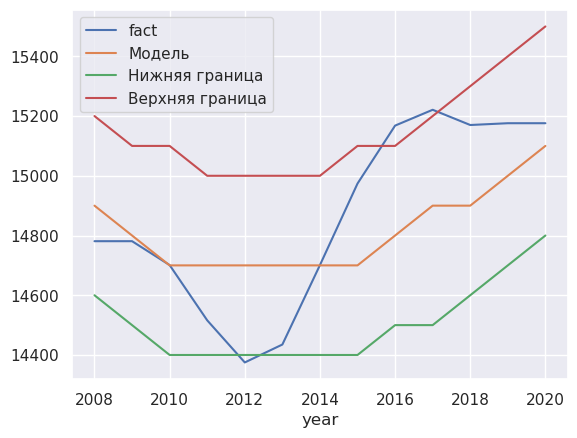

In [14]:
group_by_year.first().plot(ax=plt.gca())

In [15]:
current_pop = df_clear[df_clear['year'] == 2020]
current_pop

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
20,Белокуриха,2020,15176.0,15100.0,14800.0,15500.0
141,Новоалтайск,2020,74163.0,73900.0,73100.0,74700.0
262,Краснодар,2020,1014996.0,1007800.0,992000.0,1023800.0
383,Анапа,2020,199851.0,196900.0,192900.0,201100.0
504,Бородино,2020,16058.0,16000.0,15800.0,16200.0
...,...,...,...,...,...,...
29665,Алатырь,2020,33394.0,33600.0,33300.0,34000.0
29786,Новочебоксарск,2020,127706.0,127000.0,126400.0,127600.0
29907,Мирный,2020,35403.0,35000.0,34500.0,35500.0
30028,Якутск,2020,343423.0,337900.0,337700.0,338200.0


In [16]:
current_pop = current_pop.sort_values('fact',ascending=False)

Построим график распределения количества населения за 2020 год в 10 самых крупных городах:

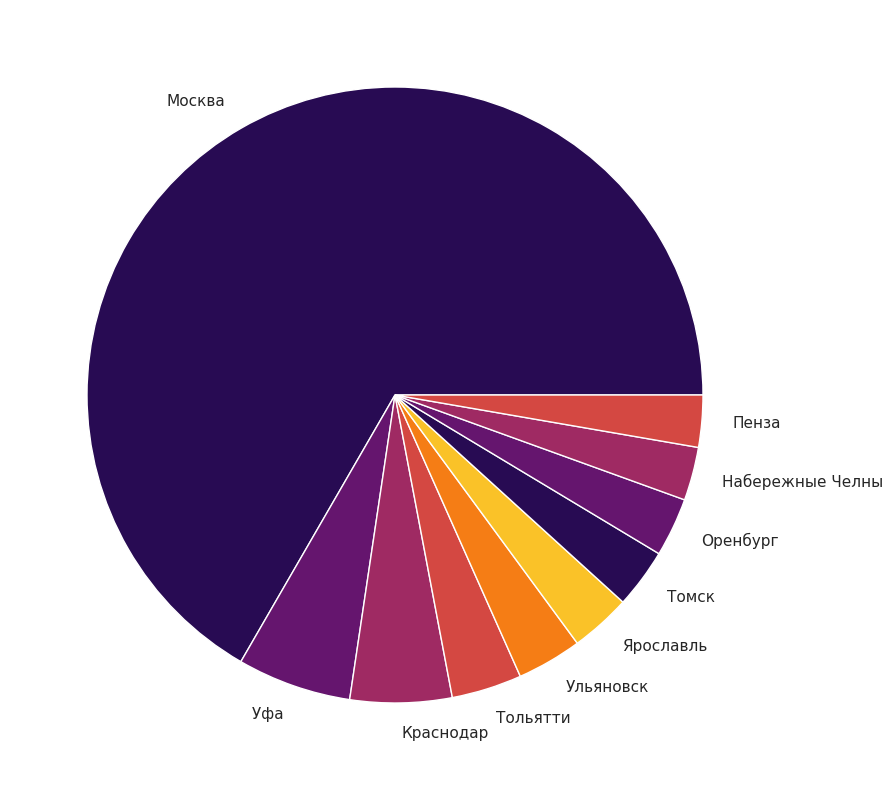

In [17]:
plt.figure(figsize=(25, 10))
plt.pie(data=current_pop[0:10], x = 'fact', labels = 'Город', colors = sns.color_palette('inferno'))
plt.show()

<AxesSubplot:xlabel='Город', ylabel='fact'>

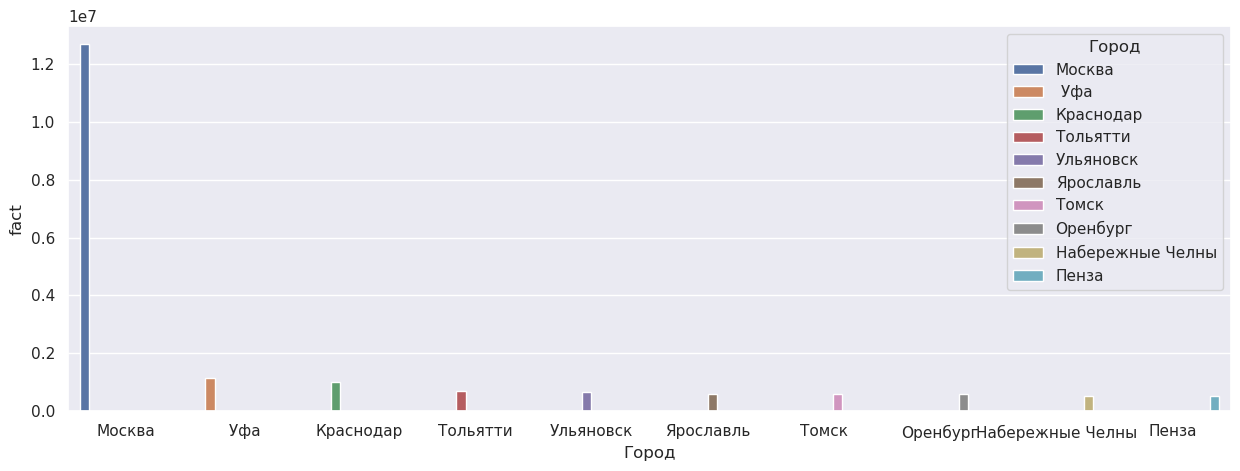

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Город', y='fact', hue='Город',data=current_pop[0:10])

Рассмотрим графики изменения численности населения в этих городах

In [19]:
popular_cities = current_pop['Город'][1:10]
df_popular_cities = df_clear[df_clear['Город'].isin(popular_cities)]
df_moscow = df_clear[df_clear['Город'] == 'Москва']
df_popular_cities

/tmp/ipykernel_23680/1045388213.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popular_cities = current_pop['Город'][1:10]


,Город,year,fact,Модель,Нижняя граница,Верхняя граница
250,Краснодар,2008,782547.0,767200.0,751500.0,783200.0
251,Краснодар,2009,782547.0,790300.0,774600.0,806400.0
252,Краснодар,2010,830536.0,813000.0,797300.0,829000.0
253,Краснодар,2011,842610.0,835200.0,819500.0,851300.0
254,Краснодар,2012,861181.0,856900.0,841200.0,872900.0
...,...,...,...,...,...,...
28572,Набережные Челны,2016,528273.0,527000.0,525300.0,528700.0
28573,Набережные Челны,2017,531134.0,528600.0,526900.0,530400.0
28574,Набережные Челны,2018,533189.0,530000.0,528300.0,531800.0
28575,Набережные Челны,2019,533873.0,531200.0,529500.0,532900.0


Москву рассмотрим отдельно, т.к. у нее значения намного больше, и изменения остальных городов неразличимо

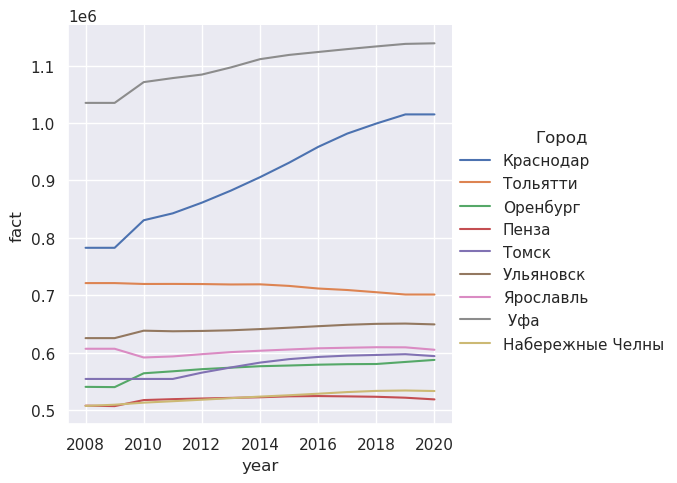

In [20]:
sns.relplot(data=df_popular_cities, x = 'year', y = 'fact', hue='Город', kind='line')

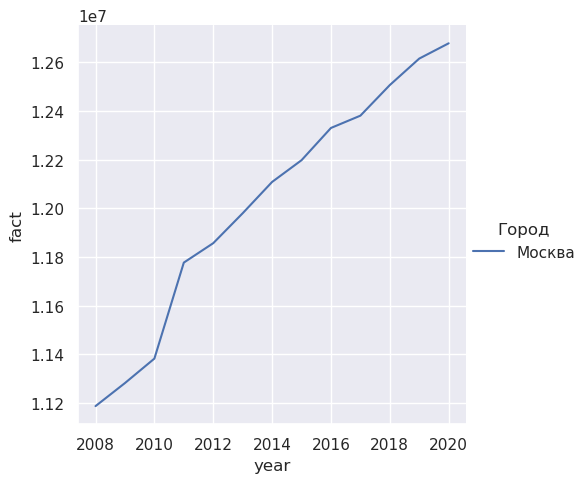

In [21]:
sns.relplot(data=df_moscow, x = 'year', y = 'fact', hue='Город', kind='line')

Рост населения в Москве, наибольший, как и ожидалось увидеть. Для остальных полулярных городов наблюдаем либо постоянный рост, либо небольшие изменения. Эти города действительно популярны и все больше людей стараются переехать в них

Рассмотрим теперь наименее популярные города за 2020 год

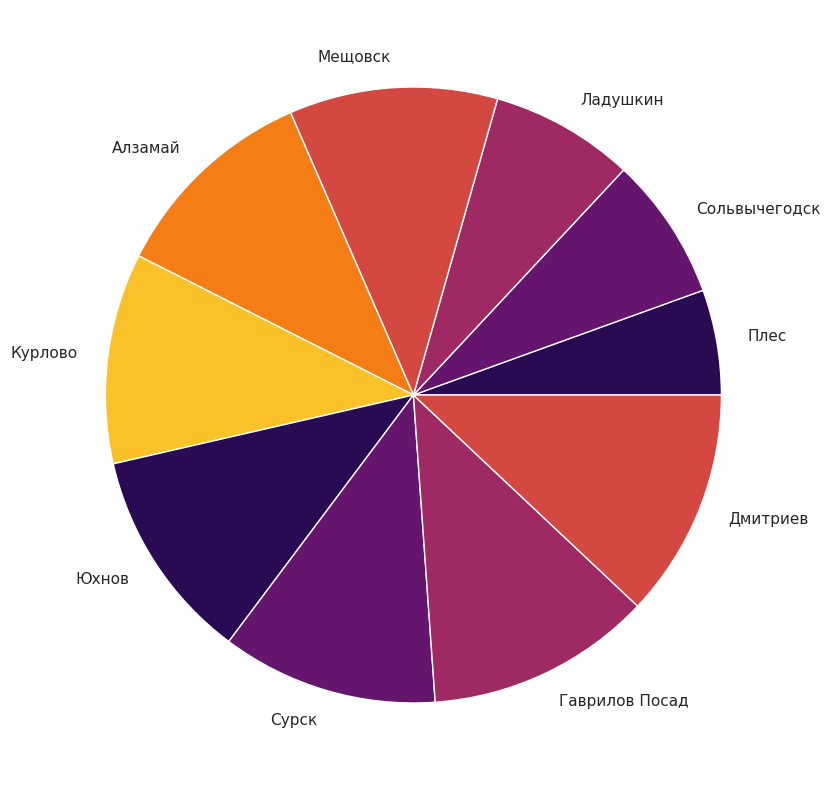

In [22]:
current_pop = current_pop.sort_values('fact')
plt.figure(figsize=(25, 10))
plt.pie(data=current_pop[0:10], x = 'fact', labels = 'Город', colors = sns.color_palette('inferno'))
plt.show()

<AxesSubplot:xlabel='Город', ylabel='fact'>

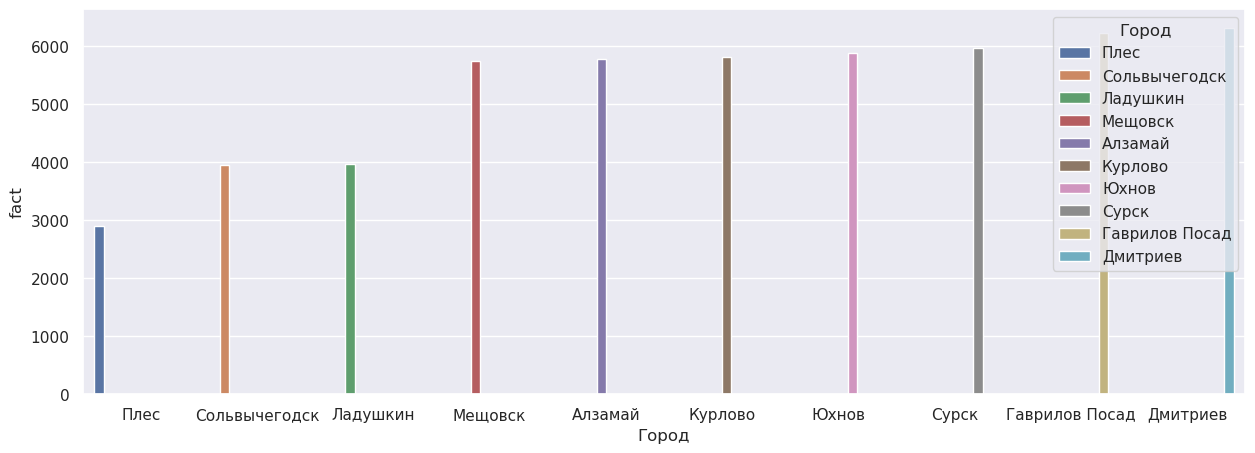

In [23]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Город', y='fact', hue='Город',data=current_pop[0:10])

Рассмотрим графики изменения численности населения в этих городах

In [24]:
unpopular_cities = current_pop['Город'][0:10]
df_unpopular_cities = df_clear[df_clear['Город'].isin(unpopular_cities)]
df_unpopular_cities

/tmp/ipykernel_23680/3607108126.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  unpopular_cities = current_pop['Город'][0:10]


,Город,year,fact,Модель,Нижняя граница,Верхняя граница
1944,Сольвычегодск,2008,4425.0,4300.0,4300.0,4400.0
1945,Сольвычегодск,2009,4425.0,4400.0,4300.0,4500.0
1946,Сольвычегодск,2010,4425.0,4400.0,4300.0,4500.0
1947,Сольвычегодск,2011,4425.0,4400.0,4400.0,4500.0
1948,Сольвычегодск,2012,4425.0,4400.0,4400.0,4500.0
...,...,...,...,...,...,...
18529,Сурск,2016,6454.0,6600.0,6500.0,6700.0
18530,Сурск,2017,6324.0,6500.0,6400.0,6600.0
18531,Сурск,2018,6147.0,6300.0,6200.0,6400.0
18532,Сурск,2019,5965.0,6200.0,6100.0,6300.0


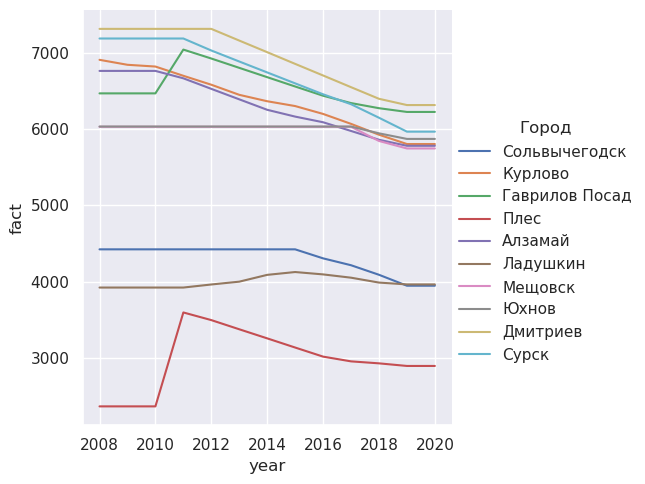

In [25]:
sns.relplot(data=df_unpopular_cities, x = 'year', y = 'fact', hue='Город', kind='line')

Во всех городах снижается значение численности населения. По всей видимости социально-экономические условия в этих регионах недостаточны даже для того, чтобы ужерэивать людей в городе, не говоря о том, чтобы привлечь новых

Построим график зависимости количества населения в зависимости от года:

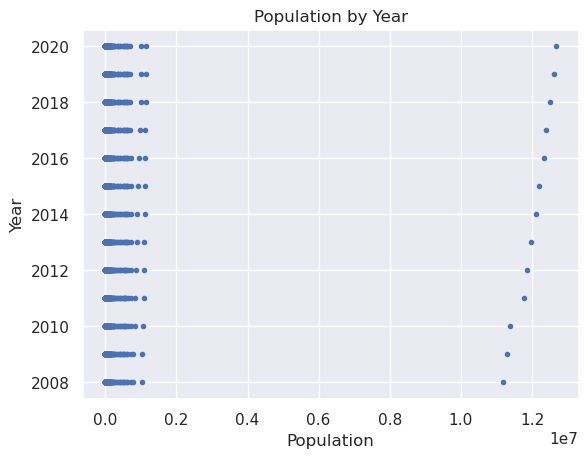

In [26]:
plt.plot(df_clear['fact'],df_clear['year'],'b.')
plt.xlabel('Population')
plt.ylabel('Year')
plt.title('Population by Year')
plt.show()

Проверим в каких городах и годах было наибольшее и наименьшее количество населения 

In [27]:
df_clear[df_clear['fact'] == df_clear['fact'].max()]

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
15750,Москва,2020,12678079.0,12633600.0,12597200.0,12670100.0


In [28]:
df_clear[df_clear['fact'] == df_clear['fact'].min()]

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
7873,Плес,2008,2370.0,2200.0,1900.0,2500.0
7874,Плес,2009,2370.0,2400.0,2200.0,2700.0
7875,Плес,2010,2370.0,2700.0,2400.0,3000.0


### В дальнейшем, на основе этих данным можно построить предсказательную модель, которая будет показывать численность населения в разных городах с течением времени. Для этого нужно большее количество данных. Были попытки построить такую модель на уже имеющихся данных, но получаешмя ошибка была коллосальна, это говорит о том, что пока данных недостаточно.